In [82]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [83]:
df = pd.read_csv('../../../../data/struc/wmh.csv')
df.describe()

,ratio
count,243.000000
mean,0.001625
std,0.001605
min,0.000586
25%,0.001009
50%,0.001243
75%,0.001685
max,0.018396


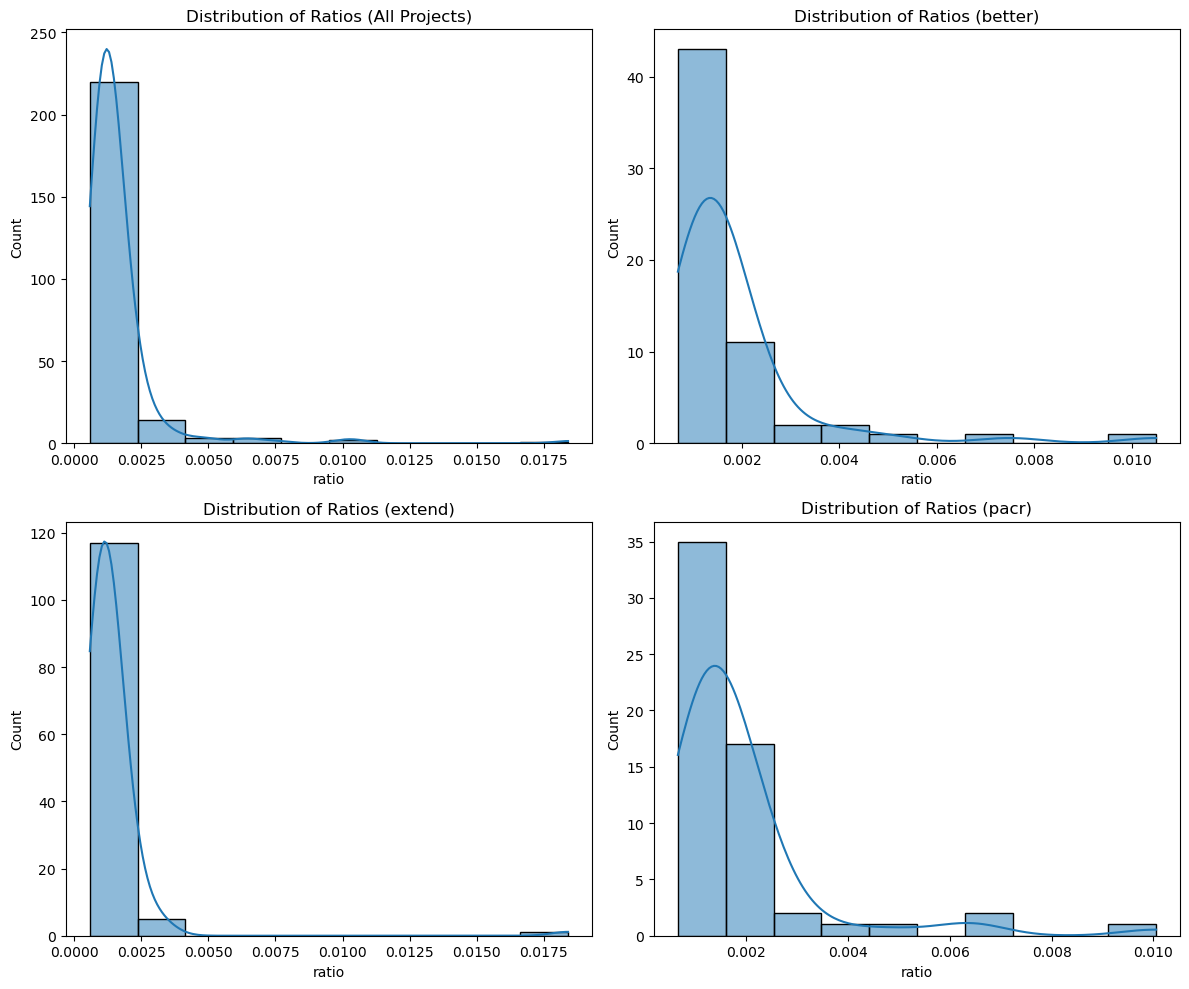

In [84]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot all ratios
sns.histplot(df['ratio'], bins=10, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Ratios (All Projects)")

# Plot distribution per project
for i, (project, sub_df) in enumerate(df.groupby('project')):
    if i + 1 < len(axes):  # Ensure we do not go out of bounds
        sns.histplot(sub_df['ratio'], bins=10, kde=True, ax=axes[i + 1])
        axes[i + 1].set_title(f"Distribution of Ratios ({project})")
    else:
        print(f"Warning: More projects than available subplots. Skipping {project}.")

plt.tight_layout()
plt.show()

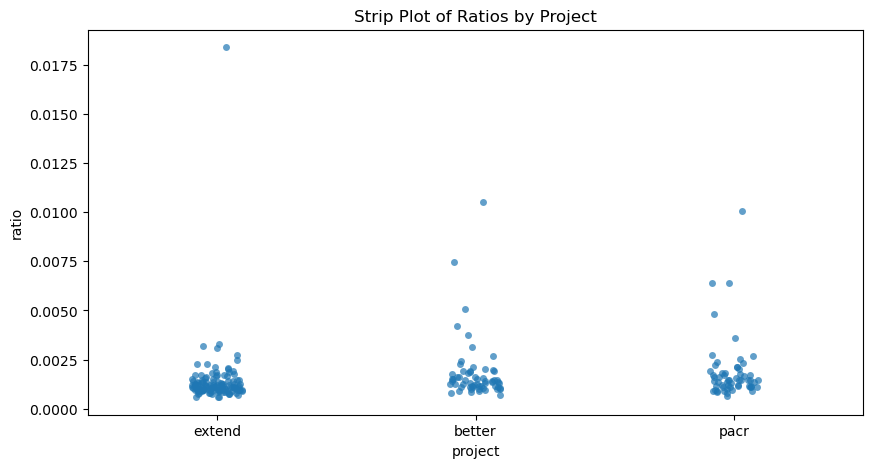

In [85]:
plt.figure(figsize=(10, 5))
sns.stripplot(x='project', y='ratio', data=df, jitter=True, alpha=0.7)
plt.title("Strip Plot of Ratios by Project")
plt.show()

***Log Transform***
- a basic and widely accepted transform that normalizes the variance, especially as variance gets larger with larger values in right skew

In [86]:
'''log transform of ratio'''
dforiginal = df.copy()
df['log_ratio'] = df['ratio'].apply(lambda x: np.log(x) if x > 0 else np.nan)
df['log_ratio'].describe()

count    243.000000
mean      -6.590283
std        0.482937
min       -7.442601
25%       -6.898782
50%       -6.690312
75%       -6.386178
max       -3.995607
Name: log_ratio, dtype: float64

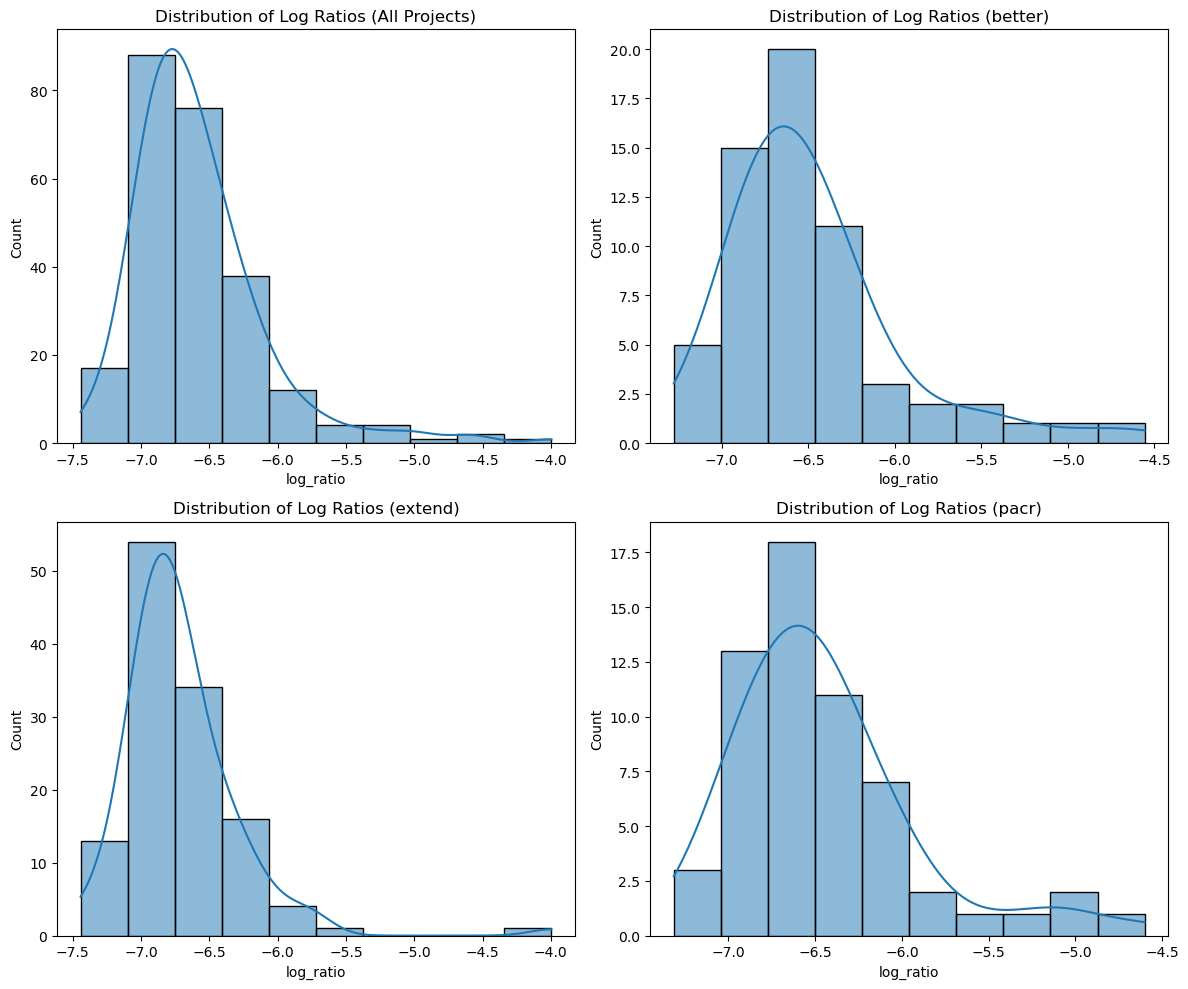

In [87]:
''' plot the log ratio'''
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
sns.histplot(df['log_ratio'], bins=10, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Log Ratios (All Projects)")
for i, (project, sub_df) in enumerate(df.groupby('project')):
    if i + 1 < len(axes):
        sns.histplot(sub_df['log_ratio'], bins=10, kde=True, ax=axes[i + 1])
        axes[i + 1].set_title(f"Distribution of Log Ratios ({project})")
    else:
        print(f"Warning: More projects than available subplots. Skipping {project}.")
plt.tight_layout()
plt.show()


In [88]:
df

,id,ratio,project,log_ratio
0,sub-2002,0.000962,extend,-6.946833
1,sub-2020,0.001367,extend,-6.594830
2,sub-2041,0.003285,extend,-5.718245
3,sub-2042,0.001130,extend,-6.785106
4,sub-2053,0.000948,extend,-6.961228
...,...,...,...,...
238,sub-experimentalSE077,0.001701,pacr,-6.376469
239,sub-experimentalSE089,0.001803,pacr,-6.318139
240,sub-experimentalSE098,0.004829,pacr,-5.333082
241,sub-experimentalSE102,0.001225,pacr,-6.704602


***see what happens when we remove the outliers***

In [89]:
print(df['log_ratio'].describe())
print("Q1%:", df['log_ratio'].quantile(0.01))
print("Q99%:", df['log_ratio'].quantile(0.99))

count    243.000000
mean      -6.590283
std        0.482937
min       -7.442601
25%       -6.898782
50%       -6.690312
75%       -6.386178
max       -3.995607
Name: log_ratio, dtype: float64
Q1%: -7.380213247977954
Q99%: -4.723768465566808


In [90]:
# Example: remove outliers from 'ratio' column in df using Laplace-tail-aware method
q_low = df['log_ratio'].quantile(0.01)
q_high = df['log_ratio'].quantile(0.99)

# Filter using the log_ratio column
df = df[(df['log_ratio'] >= q_low) & (df['log_ratio'] <= q_high)]
len(df)

237

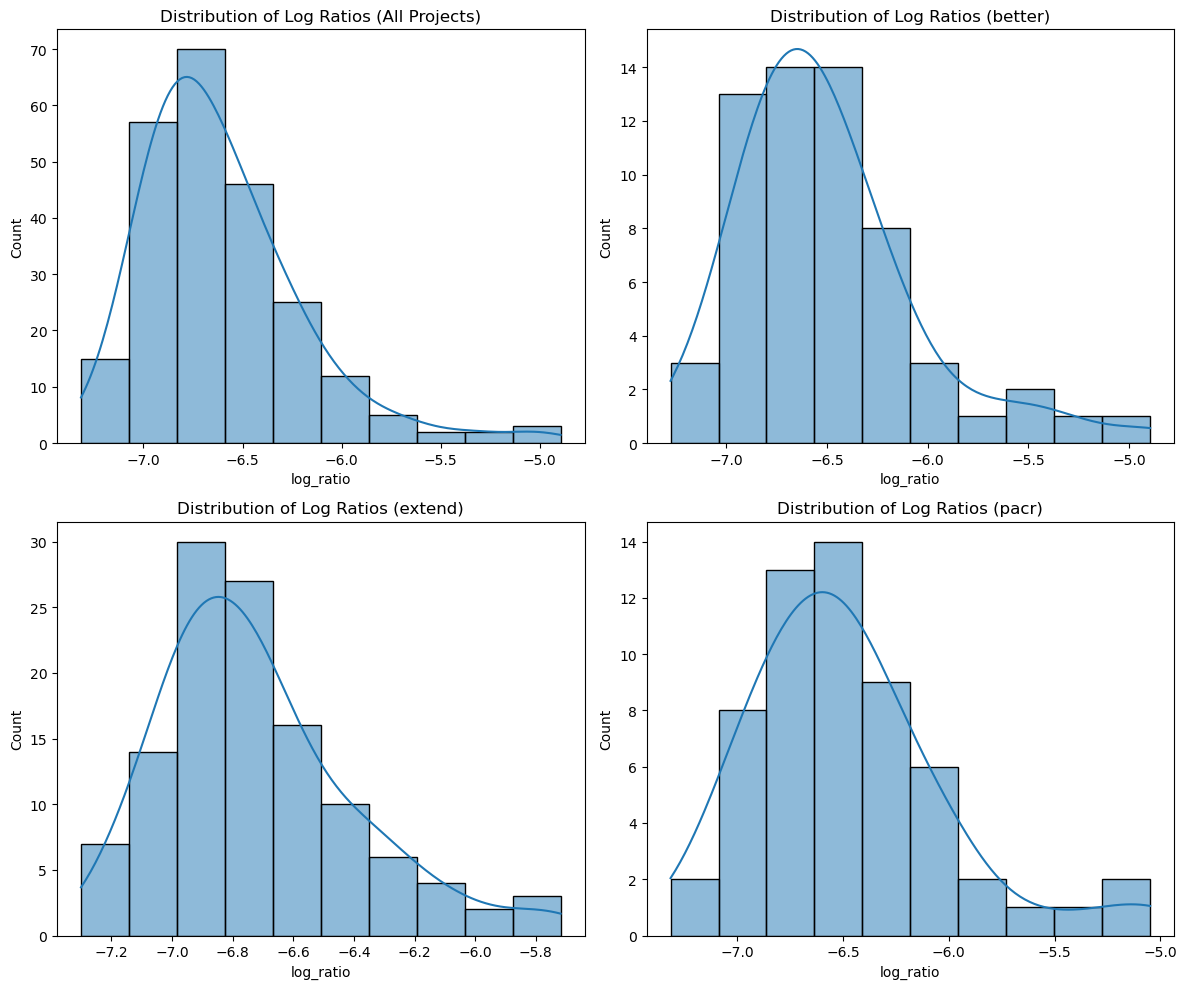

In [91]:
''' plot the log ratio without outliers '''
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
sns.histplot(df['log_ratio'], bins=10, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Log Ratios (All Projects)")
for i, (project, sub_df) in enumerate(df.groupby('project')):
    if i + 1 < len(axes):
        sns.histplot(sub_df['log_ratio'], bins=10, kde=True, ax=axes[i + 1])
        axes[i + 1].set_title(f"Distribution of Log Ratios ({project})")
    else:
        print(f"Warning: More projects than available subplots. Skipping {project}.")
plt.tight_layout()
plt.show()

***Power Transform***

- Can be an *aggressive* transform in situations
    - in that case, its basically not interpretable at all


In [92]:
''' use box-cox ratio '''
from scipy.stats import boxcox
df = dforiginal.copy()
# Ensure all values are positive (Box-Cox requires strictly positive values)
df = df[df['ratio'] > 0]

# Apply Box-Cox transformation (automatically finds optimal lambda)
df['boxcox_ratio'], lambda_opt = boxcox(df['ratio'])

# Print transformation summary
print(f"Optimal lambda: {lambda_opt}")
df['boxcox_ratio'].describe()

Optimal lambda: -0.921073556916042


count     243.000000
mean     -506.956949
std       174.145963
min     -1029.001578
25%      -623.133467
50%      -514.077946
75%      -388.217044
max       -41.968660
Name: boxcox_ratio, dtype: float64

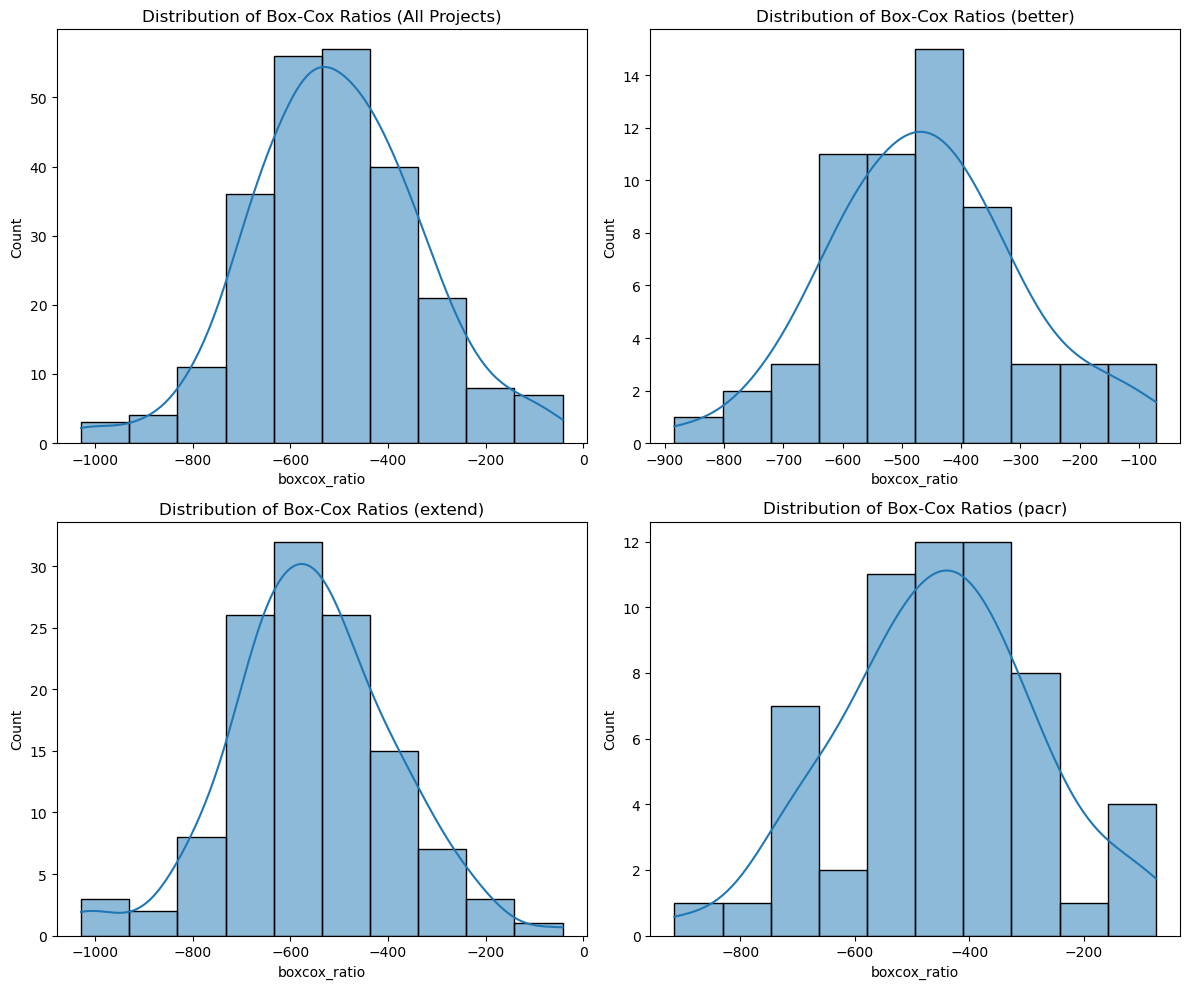

In [93]:
''' plot the box-cox ratio'''
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
sns.histplot(df['boxcox_ratio'], bins=10, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Box-Cox Ratios (All Projects)")
for i, (project, sub_df) in enumerate(df.groupby('project')):
    if i + 1 < len(axes):
        sns.histplot(sub_df['boxcox_ratio'], bins=10, kde=True, ax=axes[i + 1])
        axes[i + 1].set_title(f"Distribution of Box-Cox Ratios ({project})")
    else:
        print(f"Warning: More projects than available subplots. Skipping {project}.")
plt.tight_layout()
plt.show()
